
# Galactic Astrophysics Notebook


## Part 1: Rotation Curves 

You have just been introduced to the idea of rotation curves of galaxies and the questions that arise from these measurements. This task will allow you to compare real observational data to theoretical models of what galaxies are made of. 

Tasks 1.1 and 1.2 were given in the pre-ThaiPASS homework. If you have completed the homework already, you can skip to task 2.3.

Stars move in orbits around the centre of mass of a galaxy due to the force of gravity. The magnitude of the orbital velocity depends on the enclosed mass (the mass inside the orbit) and the distance of the star from the centre of the galaxy (the radius). In this exercise we will explore the orbital velocity of stars in a galaxy and construct a rotation curve. 
There are two data files that you will need for these tasks, you can find them on the Github Page: https://github.com/Milne-Centre/ThaiPASS2025




### Task 1.1

The file rc100224.dat contains the orbital velocities of stars in a galaxy and their radial distance from the centre of the galaxy. The first column of the file contains the radius (kpc: kiloparsec) and the second column contains observed orbital velocity (km/s: in kilometres per second). Read in the data from the file and plot the radial distance on the x-axis and the orbital velocity on the y-axis, this is the 'rotation curve' of the galaxy. 

You should use the data file *rc100224.dat*




In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math

rcdata = np.loadtxt('rc100224.dat',skiprows=1)

In [24]:
rcdata = np.array(rcdata)
radius = rcdata[:,0]
orbvel = rcdata[:,1]

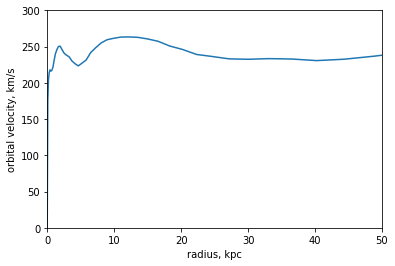

In [25]:
plt.plot(radius,orbvel)
#plt.xscale('log')
plt.ylim(0,300)
plt.xlim(0,50)
plt.ylabel('orbital velocity, km/s')
plt.xlabel('radius, kpc')
plt.show()

### Task 1.2

For this task you will use a real mass distribution data from a model of the Andromeda galaxy (M31) to calculate the orbital velocities. The mass distribution is of only baryonic matter (stars and gas). You will use the mass distribution to calculate and plot the rotation curve of the galaxy.

From the data file, remember that you need to use the cumulative/enclosed mass.

You can then use Kepler's Laws of Planetary Motion (see day one lecture slides) to calculate the orbital velocities of stars as a function of radial distance and plot this as a line graph.

You should then compare your graph to the one you made in task one and comment on any differences you find.

You should use the data file M31_mass2.dat
The first column of the file contains the radius (pc) and the second column contains the mass at that radius.



Now you will use real mass distribution data from a model of the Andromeda galaxy (M31) to calculate the orbital velocities of stars. The mass distribution is of only baryonic matter (stars and gas). You will use the mass distribution to calculate and plot the rotation curve of the galaxy.

You should use the data file M31_mass2.dat

The first column of the file contains the radius (pc: parsec) and the second column contains the total, enclosed, mass at that radius (and within it).Note that the units of radius are different here, there are 1000pc in 1kpc, ensure to use units of kpc in equation 1. 

You can then use the equation below, derived from Kepler's Laws of Planetary Motion to calculate the orbital velocities of stars as a function of radial distance and plot this as a line graph.
   
$ v = \sqrt{\frac{GM(r)}{r}} $ (Equation 1)


You can use the following value for the gravitational constant (if r in used in kpc, M is used in solar masses, v will be output in km/s):

$G=4.30091\times 10^{-6} \frac{pc (km/s)^{2}}{M_{\odot}^{-1}}$. 

    
You should then compare your graph to the one you made in the first task and comment on any differences you find.
    


In [36]:
def orbVel(r,mass):
    G=4.30091e-6
    vel = [0]
    for i in range(len(r)-1):
        tempv = np.sqrt(G*mass[i+1]/r[i+1])
        vel.append(tempv)
    return vel

In [37]:
M31data = np.loadtxt('M31_mass2.dat',skiprows=1)
M31data = np.array(M31data)
M31radius = M31data[:,0]/1000
M31mass = M31data[:,1]

M31vel = orbVel(M31radius, M31mass)

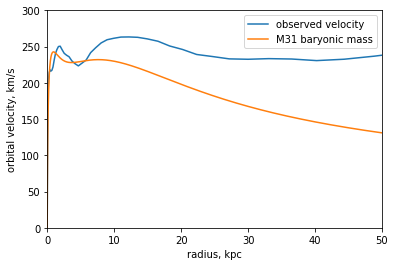

In [38]:
plt.plot(radius,orbvel, label="observed velocity")
plt.plot(M31radius,M31vel, label="M31 baryonic mass")

plt.ylim(0,300)
plt.xlim(0,50)
plt.ylabel('orbital velocity, km/s')
plt.xlabel('radius, kpc')
plt.legend()

### Task 1.3

We have seen that the two rotation curves differ as dark matter is not accounted for in the baryonic mass used in task 1.2. You will now modify the model from task two to see how this affects the rotation curve. 

To modify our model we will add a *non-baryonic component* to the mass distribution in the form of a dark matter mass profile.

For this task, you will first define a *density profile* for the dark matter, which describes the distribution of the mass. You will have to calculate the mass distribution in task 1.4 from this density profile. 

First, define a function to calculate the density at a given radius ($\rho(r)$ of the dark matter distribution using the NFW profile (please refer to lecture slides). 

$\Large \rho(r)=\frac{\rho_0}{\frac{r}{r_s}(1+\frac{r}{r_s})^2}$


For the constants, use: $\rho_c = 2.1 \times 10^3 M_{\odot}kpc^{-3}, r_s = 16.5 \times 10^3 kpc$
For initial conditions, use $\rho(r)\rvert_{r = 0} = \rho_c$

As you will be adding this dark matter mass to the baryonic mass in task 2.2 (from the file M31_mass2.dat) you should use the same radii values. 

Hint: Use a function which takes in a radius, r, and outputs the density at that radius. Use a loop in the function to loop of the values for the radius given in the last task to calculate the density values at these values of radius. 


In [29]:
def rhoCal(r):
#     r = np.array(r)
    rhozero = 2.1e3
    scaleradius = 16.5e3
#     rhozero = 2.0e+7
#     scaleradius = 14.5e2
    rhoOut = [rhozero]
    for i in range(len(r)-1):
        temprho = rhozero / ((r[i+1]/scaleradius)*(1 + r[i+1]/scaleradius)**2)
        rhoOut.append(temprho)
    return rhoOut

### Task 1.4

This part of the task is to calculate the dark matter mass profile from the density profile that you have defined.

Recall that the enclosed dark matter mass in this profile is given as: 

$M(r)= \int 4  \pi r^2 \rho(r) dr$

To solve this in python, we will use the forward Euler method. This can be used to solve ordinary differential equations with a given initial value (see https://en.wikipedia.org/wiki/Euler_method for more information).

Given the ordinary differential equation:

$M'(r) = \dfrac{dM(r)}{dr} = 4 \pi r^2 \rho(r)$,    


The mass at some radius, n+1 can be approximated by

$M_{n+1} = M_n + h \left( 4 \pi r_n^2 \rho_n  \right)$

Where h is the size of the step taken along the x-axis, this is the difference in radius between the steps, so:

Use $h = r_{n+1} - r_n$ and $r$ to be the M31 radius data.

$M_n$ is the mass at the previous step

And remember that you need to use the enclosed mass -- **not** the mass at point $r$.



For initial conditions, use $M(0) = 0$. Use $r$ to be the M31 radius data.


Define a function which returns the enclosed dark matter mass given the radius and density of the dark matter halo. 

In [30]:
def DM(r, rho):
    dmmass = [0]
    for i in range(len(r)-1):
        h = (r[i+1]-r[i])
        mTemp = 4*np.pi*r[i]**2*rho[i]*h
        mTemp2 = dmmass[i] + mTemp
        dmmass.append(mTemp2)
    return dmmass

dmRho = rhoCal(M31radius)
# testR = np.arange(0., 60*1e3,1.)
# dmRho = rho(testR)
print(max(dmRho))
dmMass = DM(M31radius, dmRho)
print(max(dmMass))

34649995800.000374
779941046075.6361


Add the dark matter mass to the baryonic mass from task 1.2 together (at the same radius), then plot all three curves on the same graph. 

979797285156.9661


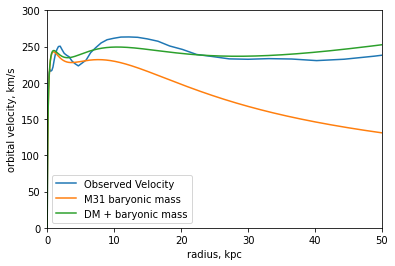

In [39]:
dmRho = rhoCal(M31radius)
dmMass = DM(M31radius, dmRho)
DMandBaryonic = np.array(dmMass) + np.array(M31mass)
print(max(DMandBaryonic))

DMvel = orbVel(M31radius,DMandBaryonic)

plt.plot(radius,orbvel, label="Observed Velocity")
plt.plot(M31radius,M31vel, label="M31 baryonic mass")
plt.plot(M31radius,DMvel, label="DM + baryonic mass")
# plt.plot(M31radius,M31vel)
plt.ylim(0,300)
plt.xlim(0,50)
plt.ylabel('orbital velocity, km/s')
plt.xlabel('radius, kpc')
plt.legend()
plt.savefig('obs_bary_DM.png')

### Additional information

If you want to do more plotting, more data of rotation curves is available at at http://www.ioa.s.u-tokyo.ac.jp/~sofue/smd2018/Atlas_data_S-galaxies/

You can press a number and find a list of data files. <code>rc[number].dat</code> are the rotation curves

'100000' is the Milky Way and '100224' is the Andromeda galaxy.

## Part 2: Rotation curves - advanced

### Task 2.1

This task is to construct the baryonic mass distribution yourself. This is based of the paper here: https://arxiv.org/pdf/1208.5712.pdf

Note that this is not following the paper strictly as there are some simplifications made


### Task 2.1

There are different parts of a galaxy that have different mass distributions. For simplicity, we only assume three copmonents:

A stellar bulge (round mass of stars in the centre of the galaxy)
A stellar disc (disk component which extends throughout the galaxy)
A stellar halo (a round component which extends above and beyond the disk) 

Using the following equation, calculate the density profiles for each component
$\rho(r) = \rho_c \text{ exp}\left(-d_N \left[\left(\dfrac{r}{a_c}\right)^{N-1}-1\right]\right)$,
where <br/>
name $=[\text{bulge, disc, stellar component}]$, <br/>
$\rho_c = [9.201e-1, 1.307e-2, 4.459e-4]$, <br/>
$a_c = [1.055, 9.0, 11.22]$, <br/>
$d_N[7.769, 3.273, 8.669]$, <br/>
$N=[2.7, 1.2, 3.0]$

For a detailed explanation of each parameter, look at the paper (equation 2)

In [32]:
def density(r, a_c, N, rho_c, d_N):
    rho = []
    a = r
    for i in a:
        tempRho = rho_c* math.exp(-d_N * ((i/(a_c*1e3))**(N**-1)-1))
        rho.append(tempRho)
    return rho

a = np.arange(0., 60.0e3, 1.)
a_c = [1.055, 9.0, 11.22]
N = [2.7, 1.2, 3.0]
rho_c = [9.201e-1, 1.307e-2, 4.459e-4]
d_N = [7.769, 3.273, 8.669]


rho = []
for i in range(len(a_c)):
    trho = density(a, a_c[i], N[i], rho_c[i], d_N[i])
    rho.append(trho)

### Task 2.2

In this task, you should calculate the mass in each interval. M(0) = 0

The approach is similar to what you did for the dark matter profile in the other notebook

In [33]:
def mass(r, rho):
    massOut = [0]
    for i in range(len(rho)-1):
        tempMass = 4*math.pi*r[i+1]**2*rho[i]*(r[i+1]-r[i])#*1e10
        massOut.append(massOut[i]+tempMass)
    return massOut

masses = []
for i in rho:
    masses.append(mass(a, i))

### Task 2.3

Now calculate the orbital velocities for each component and plot it. This way, you can see how the different components contribute to the orbital velocities. 

Plot the complete rotation curve, which means you have to add the mass from each component in each element.

In [34]:
def orbVel(r, mass):
    G = 4.3e-3
    vel = [0]
    for i in range(len(r)-1):
        tempv = np.sqrt(G * mass[i]/r[i])
        vel.append(tempv)
    return vel

orbVels = []
for i in masses:
    orbVels.append(orbVel(a, i))

/var/folders/ct/zyyjwk8j7y73dbms6p5qj90mjcmxlw/T/ipykernel_41446/287663762.py:5: RuntimeWarning: invalid value encountered in scalar divide
  tempv = np.sqrt(G * mass[i]/r[i])


### Task 2.4
Time for you to experiment! Ideas for experimentation:

* Try changing the parameters ($\rho_c, a_c, N, d_N$) and see how it changes the distributions.
* Try adding more mass components and see how you can change the orbital velocity contributions.
* Try different distribution functions, e.g NFW

(0.0, 50000.0, 0.0, 262.92805953953297)

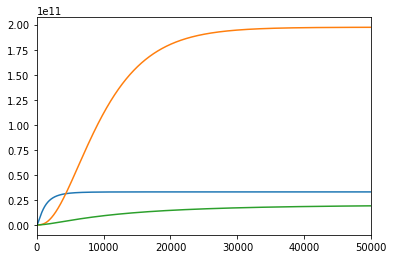

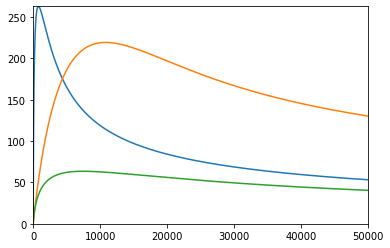

In [35]:
plt.figure()
for i in range(len(a_c)):
    plt.plot(a, masses[i])
plt.axis(xmin=0, xmax = 50e3)
plt.figure()
for i in range(len(a_c)):
    plt.plot(a, orbVels[i])
plt.axis(xmin=0, xmax = 50e3, ymin=0, ymax=max(orbVels[0]))